In [0]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

spark

Out[1]:

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.1.0 
 Master 
 local[*] 
 AppName 
 Databricks Shell

In [0]:
%scala

val containerName = ""
val storageAccountName = ""
val sas = ""
val config = "fs.azure.sas." + containerName+ "." + storageAccountName + ".blob.core.windows.net"

dbutils.fs.mount(
  source = s"wasbs://$containerName@$storageAccountName.blob.core.windows.net/TrainData",
  mountPoint = "/mnt/traindata",
  extraConfigs = Map(config -> sas))

containerName: String = commonpool
storageAccountName: String = databrickssourcepool
sas: String = ?sp=racwdl&st=2021-05-21T19:48:51Z&se=2021-05-22T03:48:51Z&spr=https&sv=2020-02-10&sr=c&sig=SJvtl0aG4yfnaSmUoYw4eYrEEjxsyrxQ%2BEo1ygZ44%2Bw%3D
config: String = fs.azure.sas.commonpool.databrickssourcepool.blob.core.windows.net
res1: Boolean = true

In [0]:
%python

from pyspark.sql.functions import *
from pyspark.sql.types import *

schema = StructType() \
      .add("comment", StringType(), True)\
      .add("emotion", StringType(), True)

dataset = spark.read.format("csv")\
      .option("header", "true")\
      .option("sep", ";")\
      .schema(schema)\
      .load("/mnt/traindata")

display(dataset)

comment,emotion
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
im grabbing a minute to post i feel greedy wrong,anger
i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
i am feeling grouchy,anger
ive been feeling a little burdened lately wasnt sure why that was,sadness
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny,surprise
i feel as confused about life as a teenager or as jaded as a year old man,fear
i have been with petronas for years i feel that petronas has performed well and made a huge profit,joy
i feel romantic too,love
i feel like i have to make the suffering i m seeing mean something,sadness


In [0]:
agg_labels = dataset.select(col("emotion")).rdd.map(lambda word: (word[0], 1))\
                                            .reduceByKey(lambda x, y: x + y)\
                                            .toDF(["label", "count"])

agg_labels.toPandas()

Out[4]:

,label,count
0,sadness,5794
1,love,1641
2,fear,2373
3,surprise,719
4,joy,6761
5,anger,2709


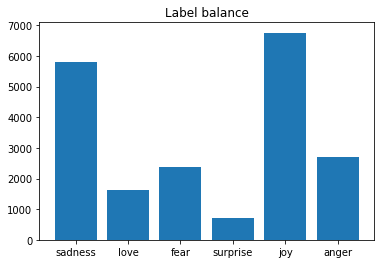

In [0]:
import matplotlib.pyplot as plt

label_summary = agg_labels.toPandas()

plt.bar(label_summary["label"], label_summary["count"])
plt.title("Label balance")
plt.show()

In [0]:
agg_labels.select("count").summary().toPandas()

Out[9]:

,summary,count
0,count,6
1,mean,3332.8333333333335
2,stddev,2400.605791600667
3,min,719
4,25%,1641
5,50%,2373
6,75%,5794
7,max,6761


In [0]:
split_sentence_udf = udf(lambda x: x.split(" "), ArrayType(StringType()))

agg_words = dataset.select(explode(split_sentence_udf(col("comment"))))\
                            .rdd.map(lambda word: (word[0], 1))\
                            .reduceByKey(lambda x, y: x + y)\
                            .toDF(["word", "count"])

agg_words.orderBy(col("count").desc()).toPandas()

Out[10]:

,word,count
0,i,32241
1,feel,13937
2,and,11995
3,to,11208
4,the,10462
...,...,...
17091,vaccine,1
17092,internalize,1
17093,textbook,1
17094,dams,1


In [0]:
agg_words.select("count").summary().toPandas()

Out[11]:

,summary,count
0,count,17096
1,mean,22.38365699578849
2,stddev,346.3475707348748
3,min,1
4,25%,1
5,50%,1
6,75%,4
7,max,32241


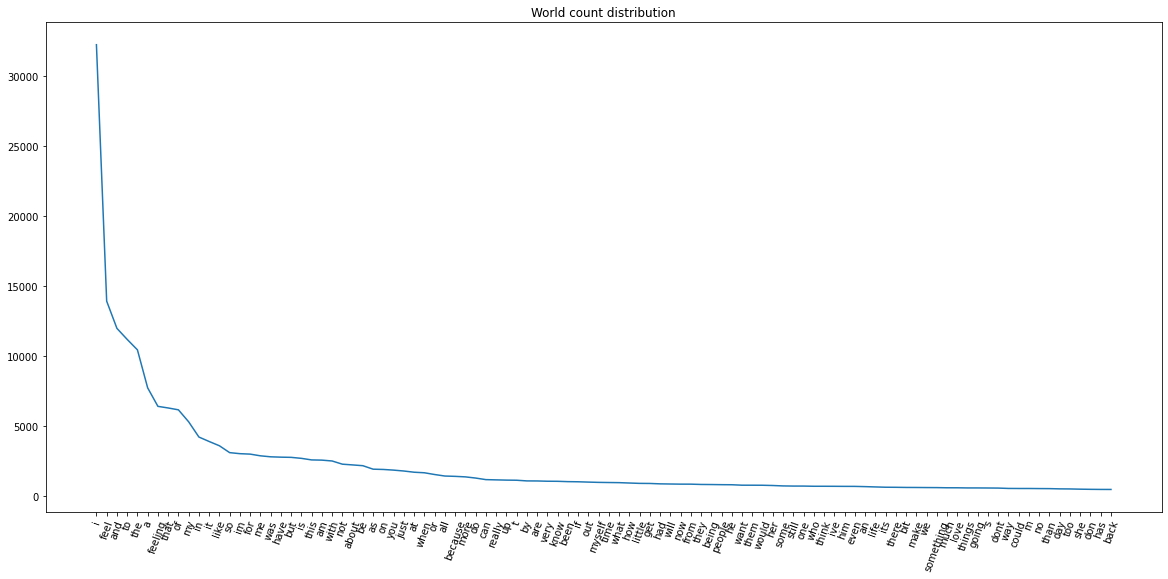

In [0]:
import matplotlib.pyplot as plt

words_distribution = agg_words.orderBy(col("count").desc()).limit(100).toPandas()

fig, ax = plt.subplots(1, 1, figsize=(20, 9))

ax.plot(words_distribution["word"], words_distribution["count"])
ax.set_title("World count distribution")

plt.xticks(rotation=70)
plt.show()

In [0]:
dataset = dataset.dropDuplicates(["comment", "emotion"])
dataset = dataset.dropna(thresh=2, subset=("comment", "emotion"))

dataset.count()

Out[17]: 19996

In [0]:
train, test = dataset.randomSplit([0.8, 0.2])

train_df, test_df = train.toPandas(), test.toPandas()

train_df

Out[18]:

,comment,emotion
0,a boyfriend with whom i split up with came ove...,anger
1,a certain friend tried to push me off a seat i...,anger
2,a father of children killed in an accident,sadness
3,a few monthe ago,anger
4,a friend of mine suggested that i become a fil...,joy
...,...,...
16048,when they phoned me from greatbritain to tell ...,joy
16049,when we rearranged furniture in our flat and g...,anger
16050,when we stayed in vienna with our class,fear
16051,when we were able to afford a new sofa a leath...,joy


In [0]:
test_df

Out[19]:

,comment,emotion
0,a group of youngsters dressed in fads talked f...,anger
1,a teacher was very blunt in his relation to a ...,anger
2,after my boyfriend and i had separated,sadness
3,always when i am well succeded,joy
4,at a party i met a girl who drew me to her,anger
...,...,...
3938,when my mother kept me in leadingstrings,anger
3939,when my mother was seriously ill and had to be...,fear
3940,when people harrass me i feel oppressed by the...,anger
3941,while cycling in the country,fear


In [0]:
X_train, y_train = train_df['comment'].values, train_df['emotion'].values
X_val, y_val = test_df['comment'].values, test_df['emotion'].values

In [0]:
from joblib import parallel_backend
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

DICT_SIZE=20000

tfidf_vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w\w+\b",
                                   analyzer='word', ngram_range=(1, 2),
                                   max_df=0.9, max_features=DICT_SIZE)

with parallel_backend('threading', n_jobs=4):
    tfidf_vectorizer.fit(train_df['comment'].append(test_df['comment']).values)
    X_train = tfidf_vectorizer.transform(X_train)
    X_val = tfidf_vectorizer.transform(X_val)

In [0]:
vocab = tfidf_vectorizer.vocabulary_
reversed_vocab = {i:word for word,i in vocab.items()}

len(vocab.keys())

Out[22]: 20000

In [0]:
from IPython.display import display, Markdown, Latex

vocab_plain = "Vocaburlary: \n\n" + ", ".join(list(vocab.keys())[:1000])

display({'text/plain': vocab_plain,
         'text/markdown': vocab_plain}, raw=True)

Vocaburlary: 

boyfriend, with, whom, split, up, came, over, to, friends, house, where, was, visiting, male, friend, in, confrontation, another, room, he, tried, find, out, if, by, my, feeling, parts, with whom, up with, over to, where was, in another, he tried, tried to, to find, find out, out if, if was, by my, my friend, by feeling, feeling my, certain, push, me, off, seat, very, violent, way, for, no, apparent, reason, it, may, be, that, excited, about, something, to push, me off, in very, very violent, way for, for no, no apparent, apparent reason, it may, may be, be that, that he, he was, excited about, about something, father, of, children, killed, an, accident, of children, in an, an accident, few, ago, mine, suggested, become, film, extra, the, idea, seemed, funny, and, reaction, rather, others, friend of, of mine, the idea, to me, me and, and my, to the, the others, gigantic, climbed, face, what, is, more, own, flat, over my, my face, face and, and what, what is, is more, more in, in my, my own, girl, entered, work, greeted, everybody, but, not, in the, work and, but not, not me, relationship, which, had, put, trust, in which, which had, put my, my trust, scene, one, man, repressed, one man, another one, study, visit, chicken, factory, after, receiving, grade, on, paper, mentioned, fear, on the, mentioned in, arriving, new, zealand, as, teenager, first, overseas, trip, change, etc, in new, new zealand, about the, the change, child, suffered, even, since, than, as child, sadness, as in, at, situation, felt, myself, neglected, at certain, school, at school, some, at the, of some, some of, of my, my friends, before, exam, getting, back, results, test, getting back, back the, the results, results of, in school, being, family, having, seen, them, years, with my, my family, not having, them for, for years, subject, unfair, treatment, working, group, boy, you, have, been, admitted, medicine, your, uncle, coming, canada, next, week, told, happy, moment, you have, have been, admitted to, school and, and your, is coming, coming back, next week, my father, told me, and it, it was, was happy, climbing, mountain, see, view, to see, day, received, score, acceptance, into, chosen, course, into my, death, grandmother, death of, from, person, loved, much, very much, discovering, good, lied, good friend, friend had, lied to, during, holiday, met, again, who, commit, suicide, she, just, left, hospital, during my, my holiday, friend who, who had, to commit, she had, had just, last, academic, year, ie, closure, during the, the last, just before, before the, the closure, weekend, home, the weekend, at home, every, time, meet, dog, has, once, bitten, every time, that has, thief, fear of, finding, am, able, student, thought, finding out, out that, that am, am not, not an, ill, seriously, anatomy, lesson, loss, close, or, relative, for the, the loss, loss of, close friend, friend or, sent, company, expense, state, plan, trip to, to another, to work, work for, for week, week at, at that, going, take, driving, going to, to take, take my, offer, do, offer to, to do, hearing, west, lot, better, china, hearing about, lot better, better than, discussion, concerning, bad, burdened, our, bad person, person for, for feeling, feeling burdened, burdened by, by our, our relationship, href, http, groggy, href http, feeling groggy, absolutely, cannot, wait, september, th, roll, around, feel, calm, suppose, waiting, cannot wait, wait for, to roll, feel calm, my waiting, love, this, skinny, doing, wonders, fabulous, love this, it is, is doing, for me, and feel, feel fabulous, accomplishment, get, physically, unhappy, life, missing, right, now, working and, and the, the feeling, feeling of, of accomplishment, get from, from it, it but, but am, unhappy with, with the, the family, family life, am missing, right now, accepted, his, apology, because, like, remorseful, how, treated, because feel, feel like, like he, remorseful for, for how, how he, he treated, tr

In [0]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels = encoder.fit(train_df['emotion'].append(test_df['emotion']).values)

In [0]:
y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)

y_train[:10]

Out[25]: array([0, 0, 4, 0, 2, 0, 0, 4, 0, 0])

In [0]:
display({'text/plain': str(X_train[0]),
         'text/markdown': str(X_train[0])}, raw=True)

(0, 1143)	1
 (0, 2270)	1
 (0, 2474)	2
 (0, 2482)	1
 (0, 2493)	1
 (0, 2542)	1
 (0, 3207)	1
 (0, 5691)	1
 (0, 5888)	1
 (0, 6118)	1
 (0, 6124)	1
 (0, 6418)	2
 (0, 6428)	1
 (0, 7297)	1
 (0, 7347)	1
 (0, 7843)	1
 (0, 8027)	1
 (0, 8084)	1
 (0, 8275)	2
 (0, 8282)	1
 (0, 9960)	1
 (0, 10608)	2
 (0, 10752)	1
 (0, 12179)	1
 (0, 12194)	1
 (0, 12228)	1
 (0, 12240)	1
 (0, 12336)	1
 (0, 13347)	1
 (0, 14399)	1
 (0, 16946)	2
 (0, 17105)	1
 (0, 17629)	1
 (0, 17631)	1
 (0, 17909)	1
 (0, 17956)	1
 (0, 18276)	1
 (0, 18407)	2
 (0, 19042)	1
 (0, 19065)	1
 (0, 19213)	1
 (0, 19354)	3
 (0, 19442)	1

In [0]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import RidgeClassifier, LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.multiclass import OneVsOneClassifier

classifier = OneVsOneClassifier(LinearSVC(max_iter=10000))

In [0]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(classifier, {'estimator__C': [0.01, 0.1, 1.0, 10.0]}, n_jobs=24)
clf.fit(X_train, y_train)

Out[30]: GridSearchCV(estimator=OneVsOneClassifier(estimator=LinearSVC(max_iter=10000)),
 n_jobs=24, param_grid={'estimator__C': [0.01, 0.1, 1.0, 10.0]})

In [0]:
clf.best_score_

Out[31]: 0.8784647594765268

In [0]:
model = clf.best_estimator_

model

Out[32]: OneVsOneClassifier(estimator=LinearSVC(max_iter=10000))

In [0]:
model.score(X_train, y_train)

Out[33]: 0.9980066031271413

In [0]:
clf.score(X_val, y_val)

Out[34]: 0.887648998224702

In [0]:
y_predicted = model.predict(X_val)

y_predicted[:10]

Out[35]: array([0, 0, 4, 2, 0, 0, 2, 2, 0, 4])

In [0]:
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

pd.DataFrame([
    ['Accuracy', accuracy_score(y_val, y_predicted)],
    ['F1 Weighted', f1_score(y_val, y_predicted, average='weighted')],
    ['Precision', precision_score(y_val, y_predicted, average='weighted')],
    ['Recall', recall_score(y_val, y_predicted, average='weighted')]
], columns=['Metric', 'Value'])

Out[36]:

,Metric,Value
0,Accuracy,0.887649
1,F1 Weighted,0.887297
2,Precision,0.887366
3,Recall,0.887649


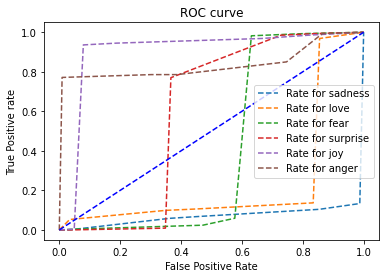

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


for i in range(len(label_summary["label"])):
    fpr, tpr, thresh = roc_curve(y_val, y_predicted, pos_label=i)
    plt.plot(fpr, tpr, linestyle='--', label=f'Rate for {label_summary["label"][i]}')

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=0)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

In [0]:
features = tfidf_vectorizer.transform(["i can not believe i spent my money on this game",
                                       "this game just makes me feel better",
                                       "yes"])
label = model.predict(features)
output = encoder.inverse_transform(label)

output

Out[45]: array(['anger', 'joy', 'joy'], dtype=object)

## Trying KFold

In [0]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

df = dataset.toPandas()
X, y = df['comment'].values, df['emotion'].values

i = 1
classifiers_insights = {}

for train_index, val_index in kf.split(X):
    display({'text/plain': f"Traning on partititon {i}",
             'text/markdown': f"Traning on partititon {i}"}, raw=True)

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    X_train = tfidf_vectorizer.transform(X_train)
    X_val = tfidf_vectorizer.transform(X_val)

    y_train = encoder.transform(y_train)
    y_val = encoder.transform(y_val)

    cv_classifier = OneVsOneClassifier(LinearSVC(C=1.0, max_iter=2000))
    cv_classifier.fit(X_train, y_train)

    classifiers_insights.update({
        i: {
            "classifier": cv_classifier,
            "score": cv_classifier.score(X_val, y_val),
            "x_val": X_val,
            "y_val": y_val
        }
    })

    display({'text/plain': f"Score for partition {classifiers_insights[i]['score']}",
             'text/markdown': f"Score for partition {classifiers_insights[i]['score']}"}, raw=True)

    i += 1

Traning on partititon 1
Score for partition 0.8815
Traning on partititon 2
Score for partition 0.8857214303575894
Traning on partititon 3
Score for partition 0.8857214303575894
Traning on partititon 4
Score for partition 0.883970992748187
Traning on partititon 5
Score for partition 0.8779694923730933

In [0]:
best_kfold = classifiers_insights[3]["classifier"]
y_predicted = model.predict(classifiers_insights[3]["x_val"])
y_val = classifiers_insights[3]["y_val"]

y_predicted[:10]

Out[53]: array([1, 2, 0, 3, 2, 2, 2, 2, 5, 4])

In [0]:
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

pd.DataFrame([
    ['Accuracy', accuracy_score(y_val, y_predicted)],
    ['F1 Weighted', f1_score(y_val, y_predicted, average='weighted')],
    ['Precision', precision_score(y_val, y_predicted, average='weighted')],
    ['Recall', recall_score(y_val, y_predicted, average='weighted')]
], columns=['Metric', 'Value'])

Out[54]:

,Metric,Value
0,Accuracy,0.976994
1,F1 Weighted,0.976971
2,Precision,0.976969
3,Recall,0.976994


In [0]:
mlflow.sklearn.save_model(best_kfold, "kfold-sentimantal-detector")

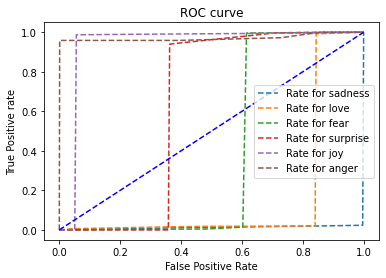

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


for i in range(len(label_summary["label"])):
    fpr, tpr, thresh = roc_curve(y_val, y_predicted, pos_label=i)
    plt.plot(fpr, tpr, linestyle='--', label=f'Rate for {label_summary["label"][i]}')

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=0)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

## Model training with data cleaning

In [0]:
from sparknlp import DocumentAssembler, Finisher
from sparknlp.annotator import Tokenizer, NorvigSweetingModel, LemmatizerModel,\
                                Normalizer, StopWordsCleaner

from pyspark.ml import Pipeline


assembler = DocumentAssembler()\
                .setInputCol("features")\
                .setOutputCol("doc")
tokenizer = Tokenizer()\
                .setInputCols(["doc"])\
                .setOutputCol("tokens_annotations")
stop_words = StopWordsCleaner()\
                .setInputCols(["tokens_annotations"])\
                .setOutputCol("clean_tokens_annotations")\
                .setCaseSensitive(False)
norvig_pretrained = NorvigSweetingModel.pretrained()\
                .setInputCols(["clean_tokens_annotations"])\
                .setOutputCol("norvig_annotations")
lemmatizer = LemmatizerModel.pretrained()\
                .setInputCols(["norvig_annotations"])\
                .setOutputCol("lemma_annotations")
normalizer = Normalizer()\
                .setInputCols(["lemma_annotations"])\
                .setOutputCol("normtoken_annotations")\
                .setLowercase(True)
finisher = Finisher()\
            .setInputCols(["normtoken_annotations"])\
            .setOutputCols(["normtokens"])\
            .setOutputAsArray(True)


sparknlp_pipeline = Pipeline().setStages([
                        assembler, tokenizer, stop_words,
                        norvig_pretrained, lemmatizer, normalizer, finisher
                    ])

tokenizer_model = sparknlp_pipeline.fit(dataset.select(col("comment").alias("features"), col("emotion")))
processed = tokenizer_model.transform(dataset.select(col("comment").alias("features"), col("emotion"))).select(col("normtokens").alias("features"), col("emotion").alias("label"))
features, label = processed.first()

spellcheck_norvig download started this may take some time.
Approximate size to download 4.2 MB
[ | ][ / ][ — ][ \ ][ | ][ / ][OK!]
lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[ | ][ / ][OK!]

In [0]:
features, label

Out[59]: (['go',
 'feel',
 'hopeless',
 'damn',
 'hopeful',
 'around',
 'someone',
 'care',
 'awake'],
 'sadness')

In [0]:
processed.show()

+--------------------+--------+
 features| label|
+--------------------+--------+
[didnt, really, f...| sadness|
[feel, pretty, pa...| sadness|
[im, grab, minute...| anger|
[ive, take, milli...|surprise|
[feel, compromise...| fear|
[feel, confused, ...| fear|
[ive, feel, littl...| sadness|
[petronas, year, ...| joy|
[go, feel, hopele...| sadness|
 [feel, groucho]| anger|
[think, easy, tim...| anger|
[feel, completely...| fear|
[start, feel, sen...| sadness|
 [feel, romantic]| love|
[feel, like, make...| sadness|
[immense, sympath...| joy|
[feel, low, energ...| sadness|
[feel, run, divin...| joy|
[ever, feel, nost...| love|
[feel, irritate, ...| anger|
+--------------------+--------+
only showing top 20 rows

In [0]:
join_tokens_udf = udf(lambda tokens: " ".join(tokens), StringType())
cleaned_df = processed.select(join_tokens_udf(col("features")).alias("features"), col("label"))

train, test = cleaned_df.randomSplit([0.8, 0.2])
train_df, test_df = train.toPandas(), test.toPandas()

train_df

Out[67]:

,features,label
0,aa meet today really start feel isolate everyo...,sadness
1,able feel everything exactly sweet boy birth c...,joy
2,able feel little bit emotional freedom,sadness
3,able feel pressure talk group way well year se...,fear
4,able feel pretty,joy
...,...,...
15981,yet meet cancer patient feel burden poor self ...,sadness
15982,yoga open feel tender two hour late m nicely s...,love
15983,young cant get feel back shes get killer grin ...,sadness
15984,young think move country feel accept belong,joy


In [0]:
DICT_SIZE = 1000

df_full = cleaned_df.toPandas()

X_df_train, y_df_train = train_df['features'].values, train_df['label'].values
X_df_val, y_df_val = test_df['features'].values, test_df['label'].values

df_vectorizer = TfidfVectorizer(token_pattern=r"(?<!\d|\S)\b[a-zA-Z]{3,}\b",
                                   analyzer='word', ngram_range=(1, 1),
                                   max_df=0.9, max_features=DICT_SIZE)

with parallel_backend('threading', n_jobs=4):
    df_vectorizer.fit(df_full['features'].values)
    X_df_train = df_vectorizer.transform(X_df_train)
    X_df_val = df_vectorizer.transform(X_df_val)

In [0]:
df_encoder = LabelEncoder().fit(df_full['label'].values)
y_df_train = df_encoder.transform(y_df_train)
y_df_val = df_encoder.transform(y_df_val)

df_labels[:10]

Out[71]: array([2, 4, 4, 5, 3, 4, 2, 2, 4, 4])

In [0]:
cl_classifier = OneVsOneClassifier(LinearSVC(max_iter=10000))
cl_classifier.fit(X_df_train, y_df_train)

cl_classifier.score(X_df_val, y_df_val)

Out[72]: 0.8880299251870324

In [0]:
y_df_predicted = cl_classifier.predict(X_df_val)

pd.DataFrame([
    ['Accuracy', accuracy_score(y_df_val, y_df_predicted)],
    ['F1 Weighted', f1_score(y_df_val, y_df_predicted, average='weighted')],
    ['Precision', precision_score(y_df_val, y_df_predicted, average='weighted')],
    ['Recall', recall_score(y_df_val, y_df_predicted, average='weighted')]
], columns=['Metric', 'Value'])

Out[74]:

,Metric,Value
0,Accuracy,0.888030
1,F1 Weighted,0.887266
2,Precision,0.888110
3,Recall,0.888030


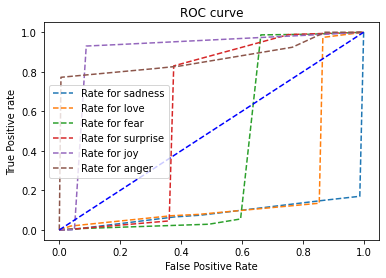

In [0]:
for i in range(len(label_summary["label"])):
    fpr, tpr, thresh = roc_curve(y_df_val, y_df_predicted, pos_label=i)
    plt.plot(fpr, tpr, linestyle='--', label=f'Rate for {label_summary["label"][i]}')

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=0)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

In [0]:
with mlflow.start_run():
  mlflow.sklearn.log_model(tfidf_vectorizer, "original-sentimental-vectorizer")
  mlflow.sklearn.log_model(model, "original-sentimental-detector")
  mlflow.sklearn.log_model(encoder, "original-sentimental-encoder")
  mlflow.sklearn.log_model(best_kfold, "kfold-sentimantal-detector")
  mlflow.sklearn.log_model(cl_classifier, "cleared-sentimantal-detector")